In [2]:
# Import required code for visualizing example models

from fooof import FOOOF
from fooof.sim.gen import gen_power_spectrum
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_model

In [3]:
# Set random seed, for consistency generating simulated data
set_random_seed(21)

# Simulate example power spectra
freqs1, powers1 = gen_power_spectrum([3, 40], [1, 1],
                                     [[10, 0.2, 1.25], [30, 0.15, 2]])
freqs2, powers2 = gen_power_spectrum([1, 150], [1, 125, 1.25],
                                     [[8, 0.15, 1.], [30, 0.1, 2]])

In [4]:
# Initialize power spectrum model objects and fit the power spectra
fm1 = FOOOF(min_peak_height=0.05, verbose=False)
fm2 = FOOOF(min_peak_height=0.05, aperiodic_mode='knee', verbose=False)
fm1.fit(freqs1, powers1)
fm2.fit(freqs2, powers2)

In [11]:
freqs1.shape

(75,)

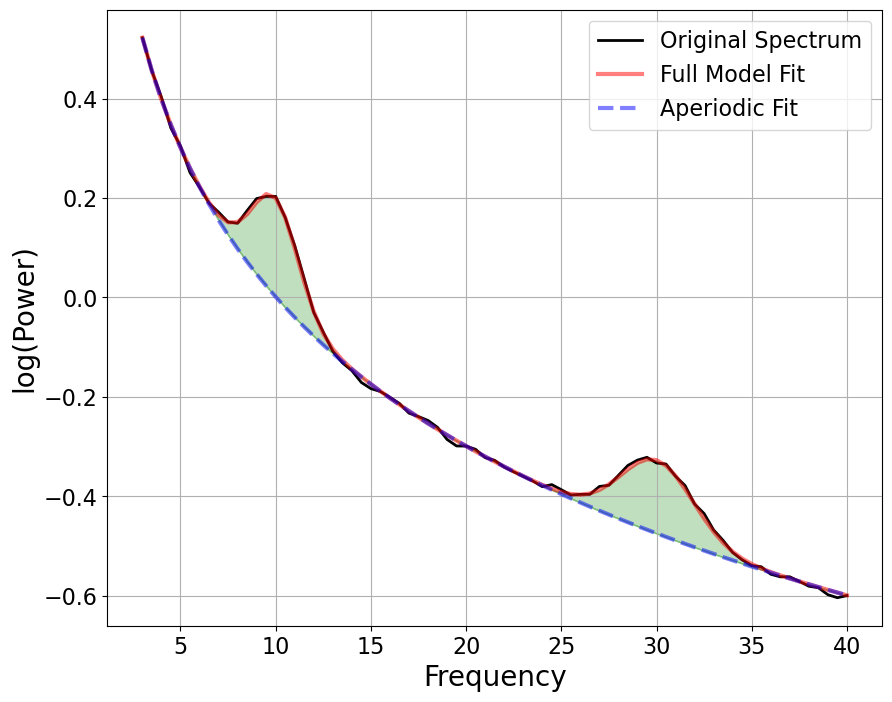

In [13]:
# Plot an example power spectrum, with a model fit
fm1.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'})

## Fitting power spectrum models

In [14]:
# Import the FOOOF object
from fooof import FOOOF

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

In [15]:
# Download example data files needed for this example
freqs = load_fooof_data('freqs.npy', folder='data')
spectrum = load_fooof_data('spectrum.npy', folder='data')


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.49 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

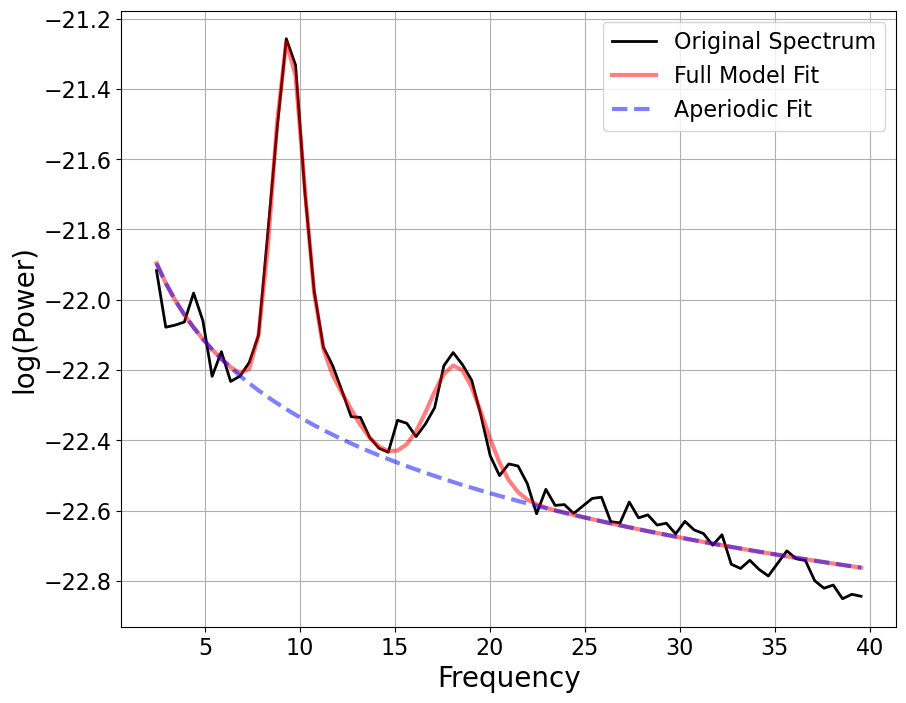

In [19]:
# Initialize a FOOOF object
fm = FOOOF()

# Set the frequency range to fit the model
freq_range = [2, 40]

# Report: fit the model, print the resulting parameters, and plot the reconstruction
fm.report(freqs, spectrum, freq_range)


In [21]:
fm.aperiodic_params_

array([-21.61849463,   0.71602469])

In [23]:
fm.peak_params_

array([[ 9.36187744,  1.04444653,  1.58739814],
       [11.17320489,  0.23009279,  2.87553573],
       [18.24842746,  0.33142173,  2.84617071]])

In [24]:
fm.error_

0.03560699584243731

## Fitting algorithm

In [25]:
# General imports
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF

# Import some internal functions
#   These are used here to demonstrate the algorithm
#   You do not need to import these functions for standard usage of the module
from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_peak_search

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

In [26]:
# Set whether to plot in log-log space
plt_log = False

# Load example data files needed for this example
freqs = load_fooof_data('freqs_2.npy', folder='data')
spectrum = load_fooof_data('spectrum_2.npy', folder='data')

# Initialize a FOOOF object, with some settings
#   These settings will be more fully described later in the tutorials
fm = FOOOF(peak_width_limits=[1, 8], max_n_peaks=6, min_peak_height=0.15)

In [27]:
# Add data to the object
fm.add_data(freqs, spectrum, [3, 40])

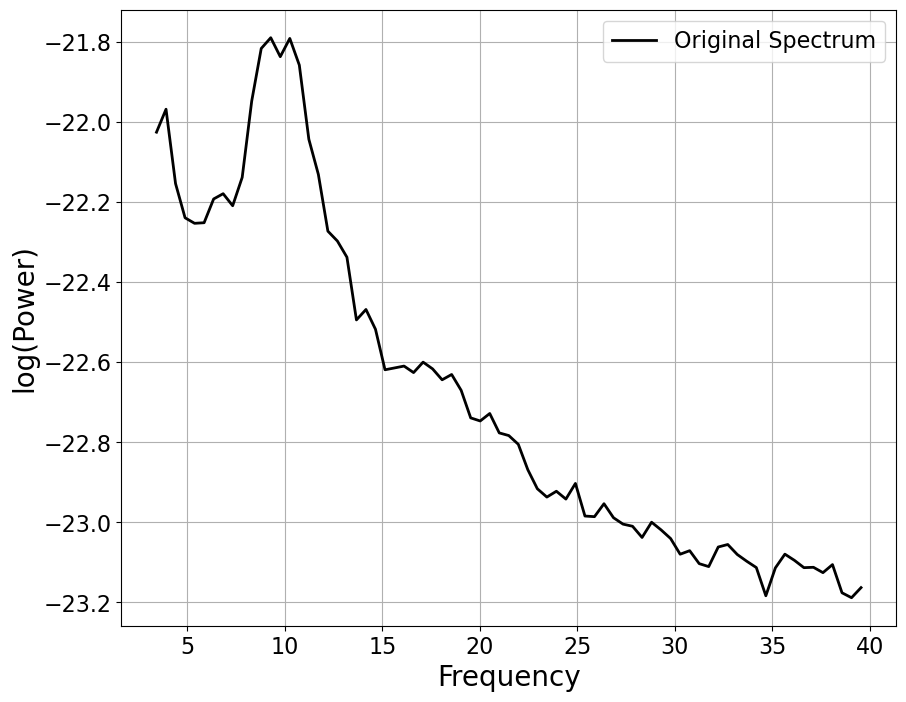

In [28]:
# Plot the power spectrum
fm.plot(plt_log)

In [30]:
# Fit the power spectrum model. this is the full fitted model. next we will see the parts that compose it
fm.fit(freqs, spectrum, [3, 40])

In [ ]:
# Do an initial aperiodic fit - a robust fit, that excludes outliers
#   This recreates an initial fit that isn't ultimately stored in the FOOOF object
init_ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))

# Plot the initial aperiodic fit
_, ax = plt.subplots(figsize=(12, 10))
plot_spectra(fm.freqs, fm.power_spectrum, plt_log, color='black', ax=ax)
plot_spectra(fm.freqs, init_ap_fit, plt_log, label='Initial Aperiodic Fit',
             color='blue', alpha=0.5, linestyle='dashed', ax=ax)